In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

%matplotlib inline

Data were simulated using a generative model

In [74]:
dat = pd.read_csv('sim_data_for_tsne.csv', usecols=range(8)[1:])

In [80]:
manifold = TSNE(random_state = 237, method = 'exact')

dims = ['X1', 'X2', 'X3', 'X4', 'X5']

coords_all = manifold.fit_transform(dat[dims])
coords_puffs = manifold.fit_transform(dat.loc[dat['group'] != 'nonpuff', dims])

In [81]:
manifold = TSNE(random_state = 237, method = 'exact')

coords_weighted = manifold.fit_transform(dat[dims], weights = dat['weight'])

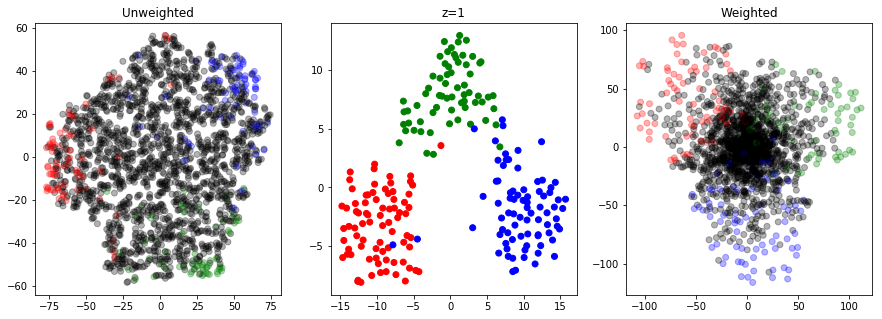

In [82]:
fig, axs = plt.subplots(1,3, figsize=(15,5))

color_dict = {'nonpuff' : 'black', 'puff1' : 'red', 'puff2' : 'green', 'puff3' : 'blue'}
axs[0].scatter(coords_all[:,0], coords_all[:,1], 
               color = [color_dict[group] for group in dat['group']],
               alpha = 0.3)
axs[0].set_title('Unweighted')
axs[1].scatter(coords_puffs[:,0], coords_puffs[:,1], color = [color_dict[group] for group in dat.loc[dat['group'] != 'nonpuff', 'group']])
axs[1].set_title('z=1')
axs[2].scatter(coords_weighted[:,0], coords_weighted[:,1], color = [color_dict[group] for group in dat['group']],
               alpha = 0.3)
axs[2].set_title('Weighted')
plt.show()